# Bayesian Computations

## Bayesian inference in a nutshell
- uncertainty is represented by probability distributions
- prior belief is updated to yield posterior belief

prior belief about some parameter:
$$ p(\theta)$$

posterior belief:
$$ p(\theta | data)$$

## Bayesian belief revision

- priors: what you believe before
- likelihood: theories about data
- The joint probability of data and hypothesis

$$ p(\theta | data) =  p(\theta) \cdot \frac{p(data | \theta)}{p(data)}$$

## Example
Imagine two players are engaged in a card game. You observe that, over the
course of 9 games, player A wins 6 games, with player B winning 3. You being
to wonder whether this is just pure luck, or whether player A really is a
better player; in this case the probability of player A winning should be
greater than 0.5 (which means that either player is equally likely to win).

Let's explore this, using some simulations.

In [78]:
using Distributions, Plots, StatsBase, Turing

Player A has 6 wins

In [79]:
wins = 6

6

out of 9 games

In [80]:
games = 9

9

We know that the number of successes k in N games follows a binomial
distribution. If both players are equally matched, then the probability of
either winning a single game is 0.5. What is the probability of player A obtaining 6
wins if neither of the players is better than the other (the probability of
winning is 0.5)?

In [81]:
pdf(Binomial(games, 0.5), 6)

0.1640625000000001

The probability if this occuring is quite high.

The probability of obtaining 1, 2, 3, 4, 5 or 6 wins is

In [82]:
cdf(Binomial(games, 0.5), 6)

0.91015625

Therefore, the probability of exceeding 6 wins is

In [83]:
ccdf(Binomial(games, 0.5), 6)

0.08984375000000003

Does this approach seem familiar to you?

It would be far more informative to estimate the probability of player A
winning. The simplest approach would be to compute the ratio 6/9.

In [84]:
6/9

0.6666666666666666

This corresponds to the maximum likelihood estimate. But how certain are we
that the probability of A winning is 6/9, especially since A might win 6 out
games even if both are as good as each other.

In order to quantify our uncertainty, we want a distribution of probability
values. We can use Bayes theorem to obtain this distribution. This states that
the probability of A winning (let's call this $\theta$) after observing the
data is
$$ P(\theta|data) \propto P(data|\theta) * P(\theta) $$

define grid of possible probability values:

In [85]:
n_points = 100
p_grid =  range(0, stop = 1, length = n_points)

p_grid |> collect

100-element Array{Float64,1}:
 0.0
 0.010101010101010102
 0.020202020202020204
 0.030303030303030304
 0.04040404040404041
 0.050505050505050504
 0.06060606060606061
 0.0707070707070707
 0.08080808080808081
 0.09090909090909091
 0.10101010101010101
 0.1111111111111111
 0.12121212121212122
 ⋮
 0.8888888888888888
 0.898989898989899
 0.9090909090909091
 0.9191919191919192
 0.9292929292929293
 0.9393939393939394
 0.9494949494949495
 0.9595959595959596
 0.9696969696969697
 0.9797979797979798
 0.98989898989899
 1.0

compute likelihood at each point in the grid

In [86]:
likelihood = map(p -> pdf(Binomial(games, p), wins), p_grid)

100-element Array{Float64,1}:
 0.0
 8.654475678240112e-11
 5.371031648844559e-9
 5.9306700388237816e-8
 3.229187766433306e-7
 1.1933452849444134e-6
 3.450792795441393e-6
 8.423920446171768e-6
 1.8164633244226886e-5
 3.5624199943288674e-5
 6.482351172144716e-5
 0.00011101116544200101
 0.00018080388947109178
 ⋮
 0.056837716706304615
 0.04569856623475691
 0.03562419994328876
 0.026735040700166603
 0.019124215056526537
 0.012850321021124291
 0.007929388001202154
 0.004325976345696502
 0.0019433619583217707
 0.0006127494460057403
 8.145523272554033e-5
 0.0

define a uniform prior

In [87]:
prior = ones(length(p_grid));

As Uniform prior has been used, unstandardized posterior is equal to likelihood

compute product of likelihood and prior

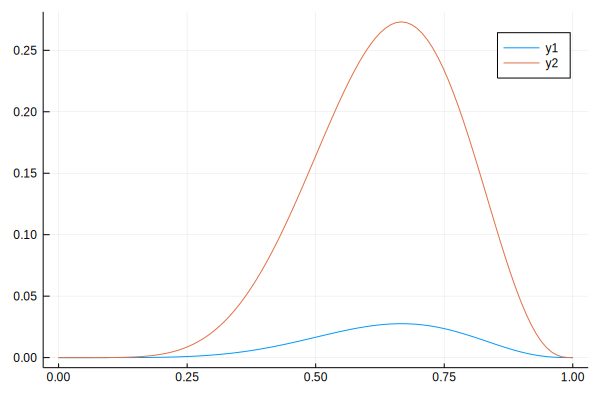

In [88]:
posterior = likelihood .* prior;

posterior = posterior/sum(posterior)

plot(p_grid, posterior)
plot!(p_grid, likelihood)

plot!(p_grid, prior)
Just to confirm that 6/9 is the maximum likelihood esimtate:

In [89]:
maximum(likelihood)

pdf(Binomial(games, 6/9), wins)

isequal(maximum(likelihood), pdf(Binomial(games, 6/9), wins))

true

In [90]:
maximum(likelihood)

0.27312909617436365

We can turn this into a function:

In [91]:
function compute_posterior(likelihood, prior)
    n_points = 100
    p_grid =  range(0, stop = 1, length = n_points)
    # compute product of likelihood and prior
    posterior = likelihood .* prior

    # standardize posterior
    # posterior = posterior ./ sum(posterior)
    posterior /= sum(posterior)

    p1 = plot(p_grid, prior, title = "Prior")
    p2 = plot(p_grid, likelihood , title = "Likelihood")
    p3 = plot(p_grid, posterior, title = "Posterior")

    plot(p1, p2, p3, layout=(1, 3), label="")
end

compute_posterior (generic function with 1 method)

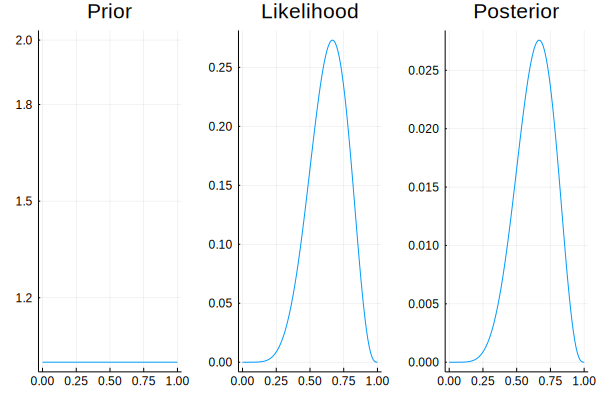

In [92]:

prior1 = ones(length(p_grid))
posterior1 = compute_posterior(likelihood, prior1)


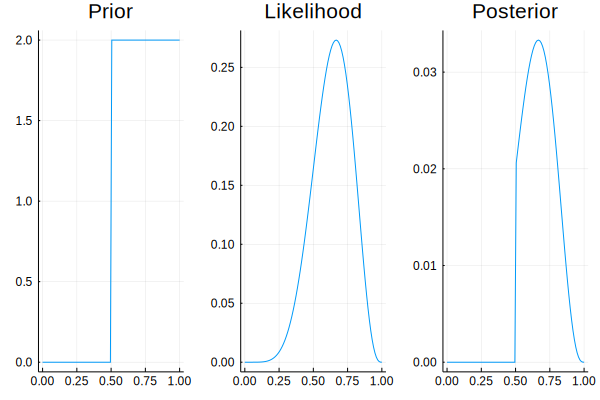

In [93]:
prior2 = 2 * (p_grid .>= 0.5)
posterior2 = compute_posterior(likelihood, prior2)



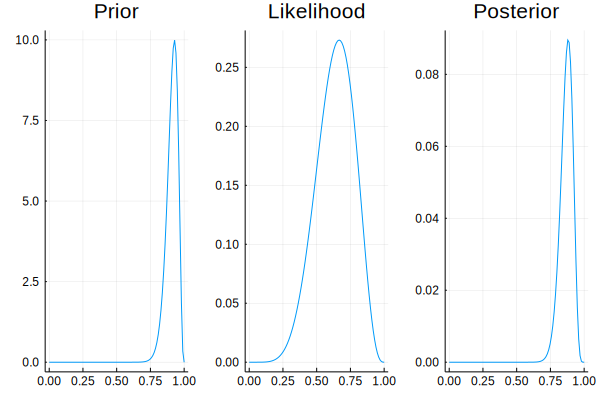

In [94]:
prior3 = map(x -> pdf(Beta(40, 4), x), p_grid)
posterior3 = compute_posterior(likelihood, prior3)



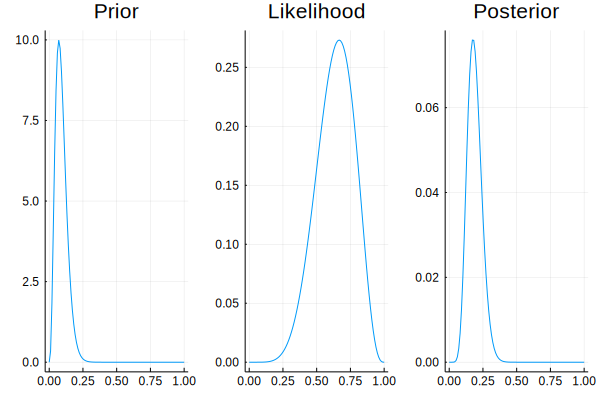

In [95]:
prior4 = map(x -> pdf(Beta(4, 40), x), p_grid)
posterior4 = compute_posterior(likelihood, prior4)


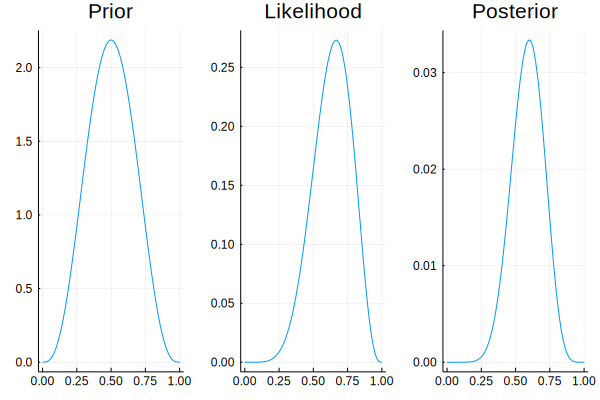

In [96]:
prior5 = map(x -> pdf(Beta(4, 4), x), p_grid)
posterior5 = compute_posterior(likelihood, prior5)

## Analytic solution

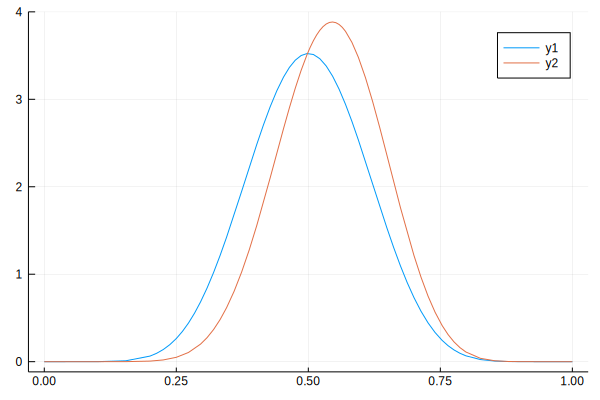

In [97]:
n = 4
h = 3
p = h/n

a, b = 10, 10                   
prior = Beta(a, b)             
plot(x -> pdf(prior, x), 0, 1)

posterior = Beta(h + a, n - h + b)        
plot!(x -> pdf(posterior, x), 0, 1)


In [98]:
function beta_binomial(n::Real, h::Real; a::Real, b::Real)
    # maximum likelihood
    p = h/n
    mu = mean(Binomial(n, p))

    # Bayesian
    thetas = range(0, stop=1, length=200)
    prior = pdf.(Beta(a, b), thetas)

    post = pdf.(Beta(h+a, n-h+b), thetas)

    likelihood = n * [pdf(Binomial(n, p), h) for p in thetas];
    plot(thetas,
         prior,
         size= [400, 400],
         label = "Prior",
         color = :blue,
         xlim = [0, 1],
         xlabel = "theta",
         ylabel = "Density")
    plot!(thetas, post, label = "Posterior", color = :red)
    plot!(thetas, likelihood, label="Likelihood", color = :green, legend = :topleft)
    vline!([(h+a-1)/(n+a+b-2)], color = :red, linestyle = :dash, label="MAP")
    vline!([mu / n], color = :green, linestyle = :dash, label="MLE")
end

beta_binomial (generic function with 1 method)

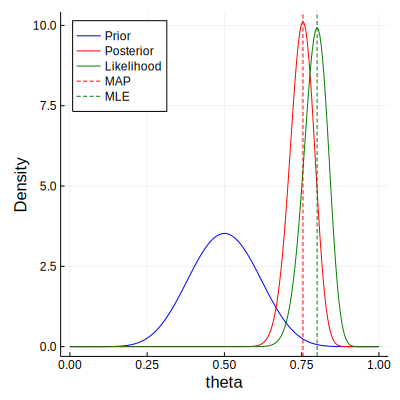

In [99]:
beta_binomial(100, 80, a = 10, b = 10)

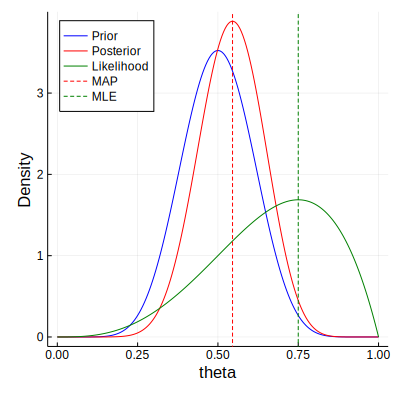

In [100]:
beta_binomial(4, 3, a = 10, b = 10)

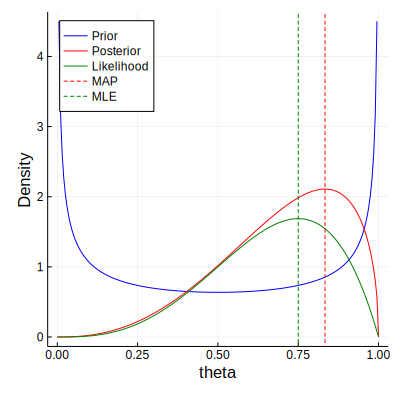

In [101]:
beta_binomial(4, 3, a = 2, b = 2)

beta_binomial(4, 3, a = 1, b = 1)

beta_binomial(4, 3, a = 0.5, b = 0.5)

## Metropolis-Hastings
Above we saw an example using a grid search, and the analytic solution. In
most cases, grid is not possible, and the analytic solution is not available.

In [102]:
function target(likelihood::UnionAll, prior::Distribution, n, h, θ)
    if (θ < 0 ||  θ > 1)
        return 0
    else
        return (pdf(likelihood(n, θ), h) * pdf(prior, θ))
    end
end

n = 100
h = 61
a = 10
b = 10

likelihood = Binomial
prior = Beta(a, b)

σ = 0.3

naccept = 0
niters = 10000
θ = rand(prior)
samples = zeros(niters + 1)
samples[1] = θ

for i ∈ 1:niters
    global θ, naccept
    θ_proposed = θ + rand(Normal(0, σ))
    ρ = min(1, target(likelihood, prior, n, h, θ_proposed)/target(likelihood, prior, n, h, θ ))
    u = rand(Uniform(0, 1))
    if u < ρ
            naccept += 1
            θ = θ_proposed
    end
    samples[i+1] = θ
end

In [103]:

println("Portion of accepted steps = " * string(naccept/niters))

Portion of accepted steps = 0.1815


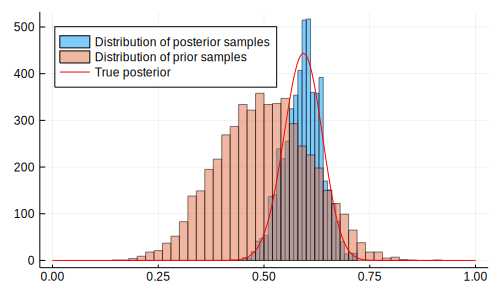

In [104]:

nmcmc = Int(round(length(samples)/2))

post = Beta(h+a, n-h+b)
thetas = range(0, stop=1, length=200)

histogram(samples[nmcmc:length(samples)],
          size = [500, 300],
          label="Distribution of posterior samples", alpha = 0.5,
          legend = :topleft)
histogram!(rand(prior, nmcmc),
          label = "Distribution of prior samples", alpha = 0.5)
plot!(thetas, 50*[pdf(post, theta) for theta in thetas], color = :red, label = "True posterior")

## Turing: A probabilistic programming language

In [105]:
using Turing

Let's simulate some more coin tossing. We have 100 tosses, and 61 successes.

In [106]:
n = 100    # number of trials
k = 61     # number of successes

61

We'll assume a prior on the probability of success:

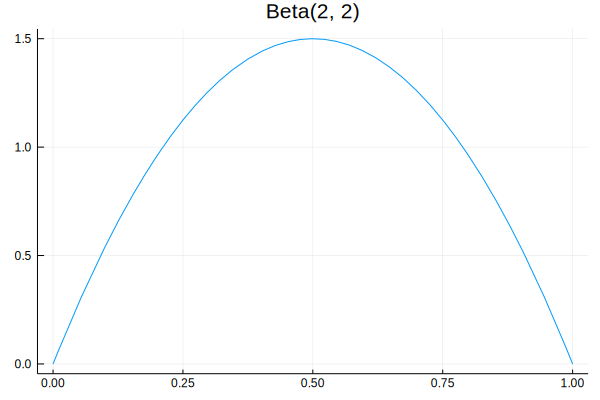

In [107]:
plot(x -> pdf(Beta(2, 2), x), 0, 1,
     title = "Beta(2, 2)", legend = :none)

In [108]:
@model coin(n, k) = begin
    # prior
    θ ~ Beta(2, 2)
    # likelihood
    k ~ Binomial(n, θ)
end

DynamicPPL.ModelGen{var"###generator#433",(:n, :k),(),Tuple{}}(##generator#433, NamedTuple())

sample 4 chains in parallel, each with 2000 samples

In [109]:
CoinChains = sample(coin(n, k), NUTS(), MCMCThreads(), 2000, 4);

┌ Info: Found initial step size
│   ϵ = 0.8
└ @ Turing.Inference /Users/andrew/.julia/packages/Turing/vFp7z/src/inference/hmc.jl:626
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/andrew/.julia/packages/AdvancedHMC/WJCQA/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/andrew/.julia/packages/AdvancedHMC/WJCQA/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/andrew/.julia/packages/AdvancedHMC/WJCQA/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/andrew/.julia/packages/AdvancedHMC/WJCQA/s

In [110]:
describe(CoinChains)
show(CoinChains)

Object of type Chains, with data of type 1000×13×4 Array{Float64,3}

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = θ

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters    mean     std  naive_se    mcse        ess   r_hat
  ──────────  ──────  ──────  ────────  ──────  ─────────  ──────
           θ  0.6050  0.0469    0.0007  0.0009  2243.0366  1.0004

Quantiles
  parameters    2.5%   25.0%   50.0%   75.0%   97.5%
  ──────────  ──────  ──────  ──────  ──────  ──────
           θ  0.5134  0.5731  0.6044  0.6372  0.6966


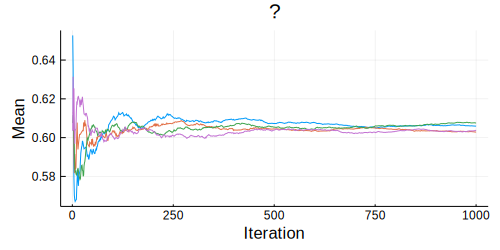

In [111]:
meanplot(CoinChains)

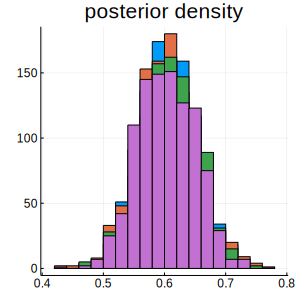

In [112]:

samples = get(CoinChains, :θ)

histogram(samples.θ, size = [300, 300], legend = false, title = "posterior density")

traceplot

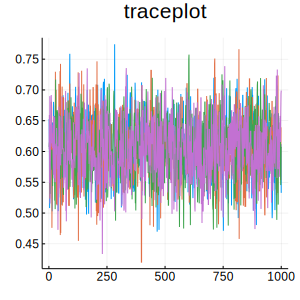

In [113]:
plot(samples.θ, size = [300, 300], legend = false, title = "traceplot")

## Normal distribution

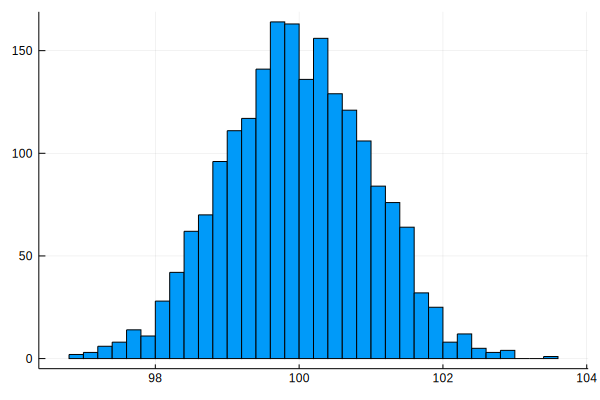

In [114]:
N = 2000
y = rand(Normal(100, 1), N)
histogram(y, legend = false)

In [115]:

@model normal(y) = begin 
    σ = 1
    ## prior
    μ ~ Normal(0, 1)
    
    ## likelihood  
  for i ∈ eachindex(y)
     y[i] ~ Normal(μ, σ)
  end
end

NormalChain = sample(normal(y), NUTS(), 2000);


┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /Users/andrew/.julia/packages/Turing/vFp7z/src/inference/hmc.jl:626
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:13


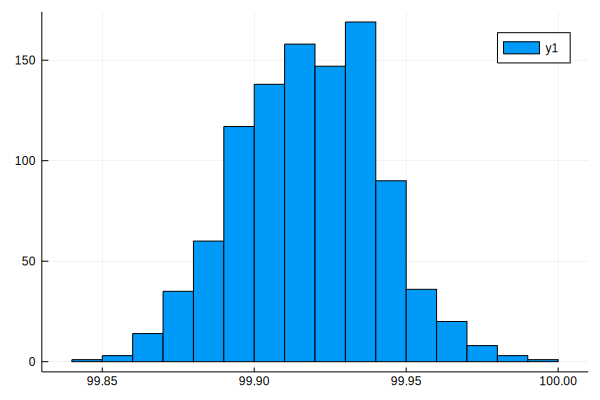

In [116]:
samples = get(NormalChain, :μ)

histogram(samples.μ)


## Linear regression

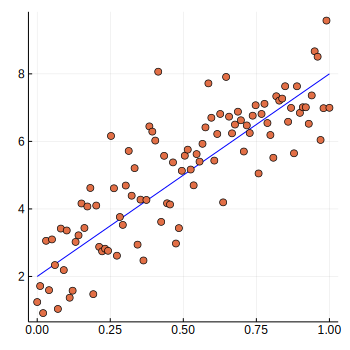

In [117]:

n = 100
a_true = 6
b_true = 2
x = range(0, stop=1, length = n)
x = convert(Array, x)
y = a_true*x .+ b_true + rand(Normal(0,1), n);

plot(x, a_true*x .+ b_true, legend = false, size = [350, 350], color = :blue)
scatter!(x, y)

In [118]:
@model lin_reg(x, y) = begin
  a ~ Normal(0, 10)
  b ~ Normal(0, 10)
  linpred = a * x .+ b
    
  σ ~ truncated(Cauchy(2.5), 0, Inf)

  for i ∈ eachindex(y)
    y[i] ~ Normal(linpred[i], σ)
  end
end

LinearRegressionChain = sample(lin_reg(x, y), NUTS(), 2000);

┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference /Users/andrew/.julia/packages/Turing/vFp7z/src/inference/hmc.jl:626
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02


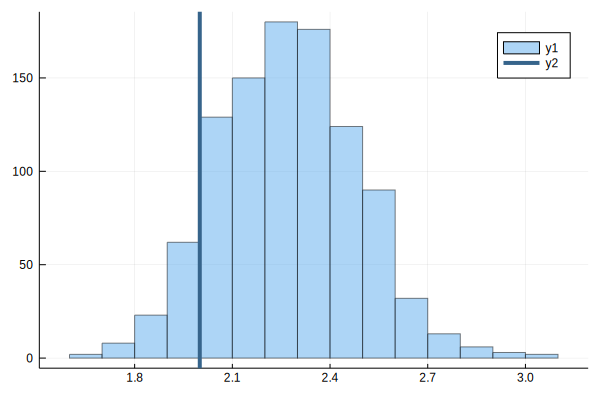

In [119]:
samples = get(LinearRegressionChain, [:a, :b, :σ])
histogram(samples.b, color = :steelblue2, alpha = 0.5)
vline!([b_true], linecolor = :steelblue4, linewidth = 4)
